# Parcial 2, punto B

## _Coordinates_ and _MetricTensor_

Import the gravipy package and initialization of a pretty-printing mode in IPython environment

In [1]:
from gravipy import * # import SymPy and GraviPy package
init_printing()

Definition of coordinates and metric tensor.

In [7]:
n=2 # Dimension of the Manifold
alpha, t, r, beta = symbols('\\alpha, t, r, \\beta') # define symbolic variables
x = Coordinates('\chi', [t, r]) # create a four-vector of coordinates object instantiating the Coordinates class
Metric = diag((beta - alpha**2*r**2), 1/(alpha**2*r**2-beta) ) # define a matrix of a metric tensor components  
g = MetricTensor('g', x, Metric) # create a metric tensor object instantiating the MetricTensor class

Each component of any tensor object, can be computed by calling covariant indices with positive integer values (1, 2, ..., dim) and contravariant indices with negative values (-dim, ..., -2, -1).

In [8]:
x(-1)

In [9]:
from IPython.core.display import display, Math

for i in range(1,n+1):
    display(Math('x^{'+str(i)+'} = '+latex(x(-i))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
for i in range(1,n+1):
    display(Math('x_{'+str(i)+'} = '+latex(x(i))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
g(-2, -1)

In [12]:
g(1,1)

In [13]:
x(1)

Visualization can be made in matrix representation:

In [14]:
x(-All)

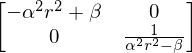

In [15]:
g(All, All)

In [16]:
g(All, n)

## Predefined Tensors

The GraviPy package contains a number of predetermined _Tensors_:

In [17]:
print([cls.__name__ for cls in vars()['Tensor'].__subclasses__()])

['Christoffel', 'Ricci', 'Riemann', 'Einstein', 'Geodesic']


### The _Christoffel_ symbols

_Christoffel_ class that represents Christoffel symbols of the first and second kind. (Note that the Christoffel symbols are not tensors) 

$$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu, \nu} + g_{\rho \nu, \mu} - g_{\mu \nu, \rho})$$


Let's create an instance of the _Christoffel_ class for the Schwarzschild metric g and compute some components of the object

In [18]:
Ga = Christoffel('Ga', g)
Ga(1, 2, 1)

Connections are Christoffel symbols of the second kind, and they are called as

In [19]:
Ga(-2,2,1)

To visualize all the components we use the attribute .components

In [20]:
Ga.components

The _Matrix_ representation of the Connections is the following

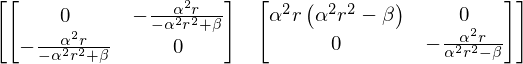

In [21]:
Ga(-All, All, All)

### The _Riemann_ Tensor

$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

In [22]:
Rm = Riemann('Rm', g)

Nonzero components of the _Riemann_ tensor (up to symmetries) are

In [23]:
from IPython.core.display import display, Math
for i, j, k, l in list(variations(range(1, n+1), 4, True)):
    if Rm(i, j, k, l) != 0 and k<l and i<j:
        display(Math('R_{'+str(i)+str(j)+str(k)+str(l)+'} = '+latex(Rm(i, j, k, l))))

<IPython.core.display.Math object>

You can also display the matrix representation of the tensor

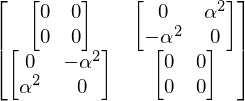

In [24]:
Rm(All, All, All, All)

Contraction of the _Riemann_ tensor $R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

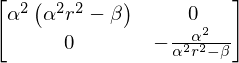

In [25]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k) for i, k in list(variations(range(1, 3), 2, True))], zeros(n))
ricci.simplify()
ricci

### The _Ricci_ Tensor

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

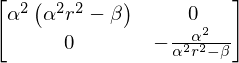

In [26]:
Ri = Ricci('Ri', g)
Ri(All, All)

Contraction of the _Ricci_ tensor $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$ can be computed with the attribute .scalar()

In [27]:
Ri.scalar()

### The _Einstein_ tensor

$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

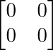

In [28]:
G = Einstein('G', Ri)
G(All, All)

### _Geodesics_

$$ w_{\mu}  = \frac{d^2x_{\mu}}{d\tau^2} - \frac{1}{2}g_{\rho \sigma, \mu} \frac{dx^{\rho}}{d\tau}\frac{dx^{\sigma}}{d\tau} $$

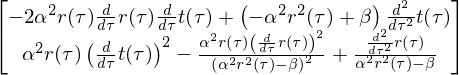

In [29]:
tau = Symbol('\\tau')
w = Geodesic('w', g, tau)
w(All).transpose()

Please note that instantiation of a _Geodesic_ class for the metric $g$ automatically turns on a _Parametrization_ mode for the metric $g$.  
Then all coordinates are functions of a world line parameter $\tau$

### _Kretchmann_ Scalar

$K = R_{\mu  \nu \rho \sigma} R^{\mu \nu \rho \sigma}$

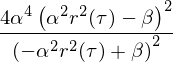

In [30]:
kretch = sum([Rm(i, j, k, l)*Rm(-i, -j, -k, -l) for i, j, k, l in list(variations(range(1, n+1), 4, repetition=True))])
kretch.simplify()
kretch

In [39]:
simplify(Out[63])

KeyError: 63